In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

In [2]:
import importlib
import plotting_utils
import utils
import euler_utils
importlib.reload(plotting_utils)
importlib.reload(utils)

/cluster/apps/nss/gcc-6.3.0/python/3.8.5/x86_64/lib64/python3.8/site-packages/pyproj/__init__.py:78: UserWarning: Valid PROJ data directory not found. Either set the path using the environmental variable PROJ_LIB or with `pyproj.datadir.set_data_dir`.
  warnings.warn(str(err))


<module 'utils' from '/cluster/home/mfrancesc/IVT/eqasim-java/switzerland/Analysis_notebooks/utils.py'>

In [3]:
def read_output(output_directory, last_iter=-1):
    drt_legs = []
    global_stats = []
    drt_trips_stats = []
    drt_predictions = []
    
    iter_0_path = os.path.join(output_directory,'ITERS','it.0')
    binned = '0.drt_zonalAndTimeBinWaitingTime.csv' in os.listdir(iter_0_path)
    if binned:
        binned_wait_time = []
        binned_delay_factor = []
    
    if last_iter == -1:
        last_iter = len(os.listdir(output_directory + '/ITERS')) - 1
    for i in tqdm(range(last_iter+1)):
        iter_path = os.path.join(output_directory,'ITERS','it.' + str(i)) + \
                    '/' + str(i) + '.'
        global_stats.append(pd.read_csv(iter_path + 'drt_globalStats.csv', sep=';'))
        if binned:
            binned_wait_time.append(pd.read_csv(iter_path + 'drt_zonalAndTimeBinWaitingTime.csv', sep=';'))
            binned_delay_factor.append(pd.read_csv(iter_path + 'drt_distanceAndTimeBinDelayFactor.csv', sep=';'))
        
        drt_legs.append(pd.read_csv(iter_path + 'drt_legs_drt.csv', sep=';'))
        drt_trips_stats.append(pd.read_csv(iter_path + 'drt_drtTripsStats.csv', sep=';'))
        drt_predictions.append(pd.read_csv(iter_path + 'drt_drtTripsPredictions.csv', sep=';'))

        
    d = {'drt_legs': drt_legs,
         'global_stats': global_stats,
         'drt_trips_stats': drt_trips_stats,
         'drt_predictions': drt_predictions
        }
    
    if binned:
        d['binned_wait_time'] = binned_wait_time
        d['binned_delay_factor'] = binned_delay_factor
    
    if 'drt_link2FixedZones.csv' in os.listdir(output_directory):
        link2zones_csv = pd.read_csv(os.path.join(output_directory,'drt_link2FixedZones.csv'), sep=';')
        link2zones_csv = link2zones_csv.set_index('link_id')
        link2zones = {}
        for link_id, zone in link2zones_csv.iterrows():
            link2zones[link_id] = zone.zone.item()
        fixed_zones = gpd.read_file(os.path.join(output_directory,'drt_FixedZones.shp'))
        d['link2zones'] = link2zones
        d['fixedZones'] = fixedZones
    
    return d

In [4]:
scratch_folder = '/cluster/scratch/mfrancesc/IVT/SA_scenario/'

In [5]:
data_global = read_output(scratch_folder + 'global_average_2', last_iter=50)


100%|██████████| 51/51 [00:37<00:00,  1.37it/s]


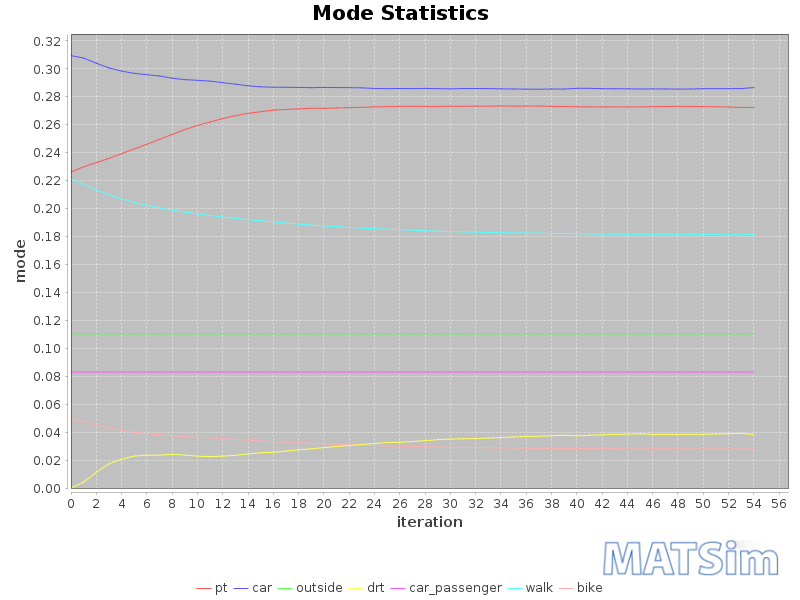

In [6]:
display(plotting_utils.show_modeshare(scratch_folder + 'global_average_2'))

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
0,168007.0,2583.084367,2783.13153,250.060952,651.272658,1469.38865,3464.858404,6583.123289,8624.81177,12439.80847,22499.237224


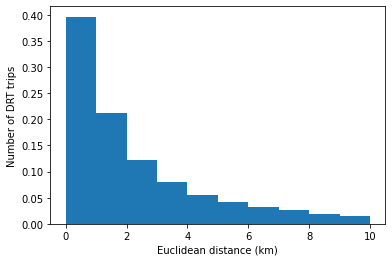

In [7]:
plotting_utils.plot_euclidean_distance_ditribution(data_global, iteration=-1)

In [8]:
start_time = 6
end_time = 24
bin_duration_min = 30
min_distance = 0
max_distance = 10000
bin_distance_m = 1000

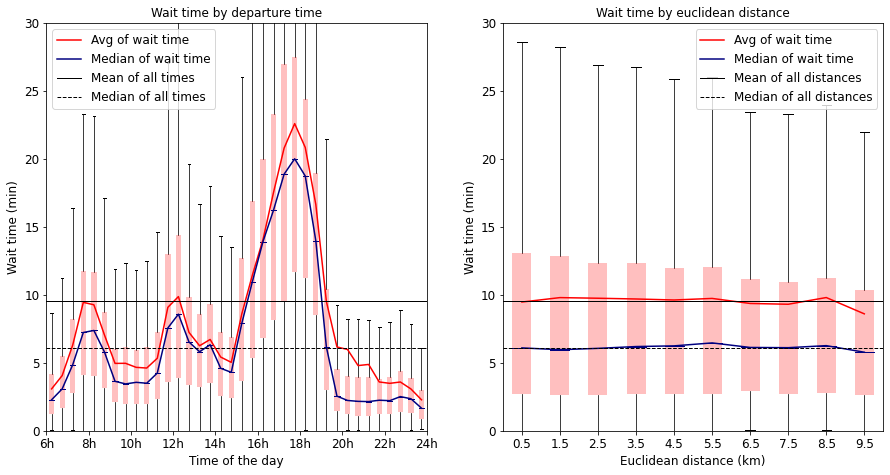

In [9]:
plotting_utils.plot_waiting_time(data_global, start_time, end_time, bin_duration_min,
                 min_distance, max_distance, bin_distance_m, iteration=-1, 
               filter_router_zeros=False, add_boxplots=True, ylim=30)

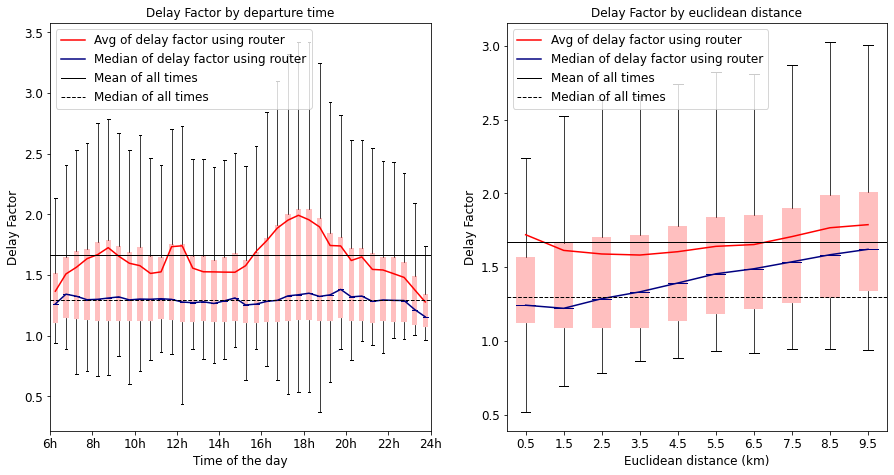

In [10]:
plotting_utils.plot_delay_factor(data_global, start_time, end_time, bin_duration_min,
                 min_distance, max_distance, bin_distance_m, iteration=-1, 
                plot_estimated=False, plot_using_sum=False, filter_router_zeros=False,
                                add_boxplots=True)

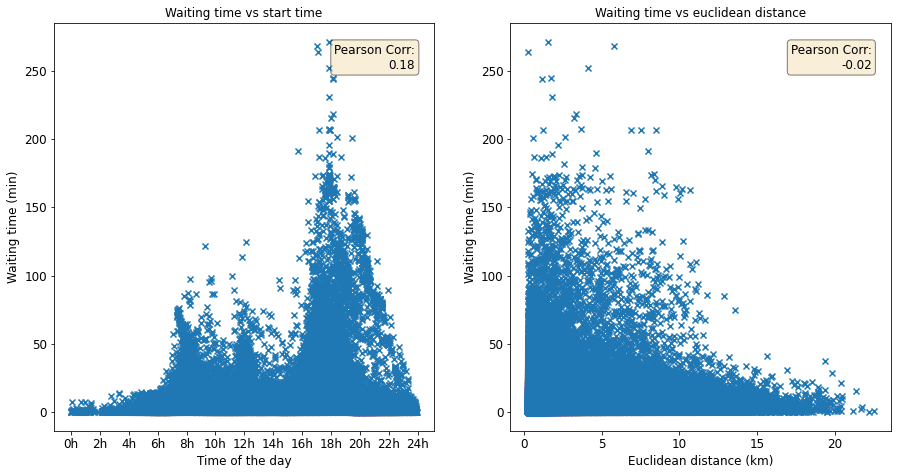

In [11]:
plotting_utils.plot_waiting_time_scatter(data_global)

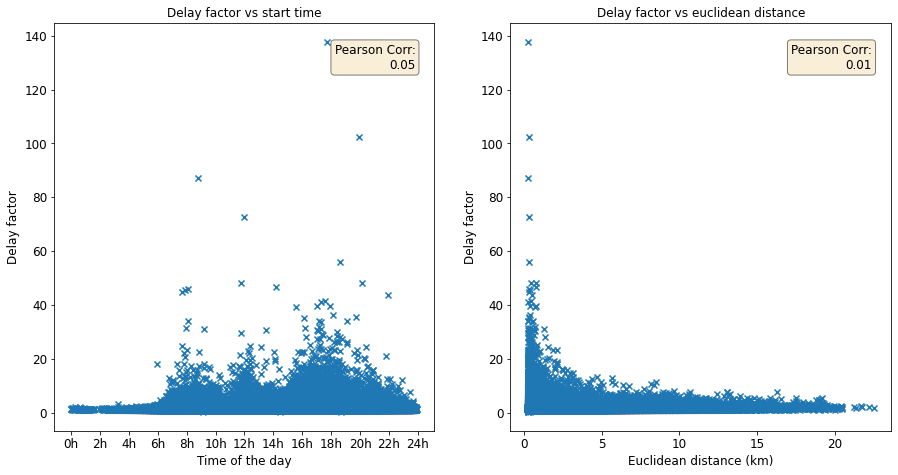

In [12]:
plotting_utils.plot_delay_factor_scatter(data_global)

We plot different time bins and distance bins (We can use the same parameters as before):

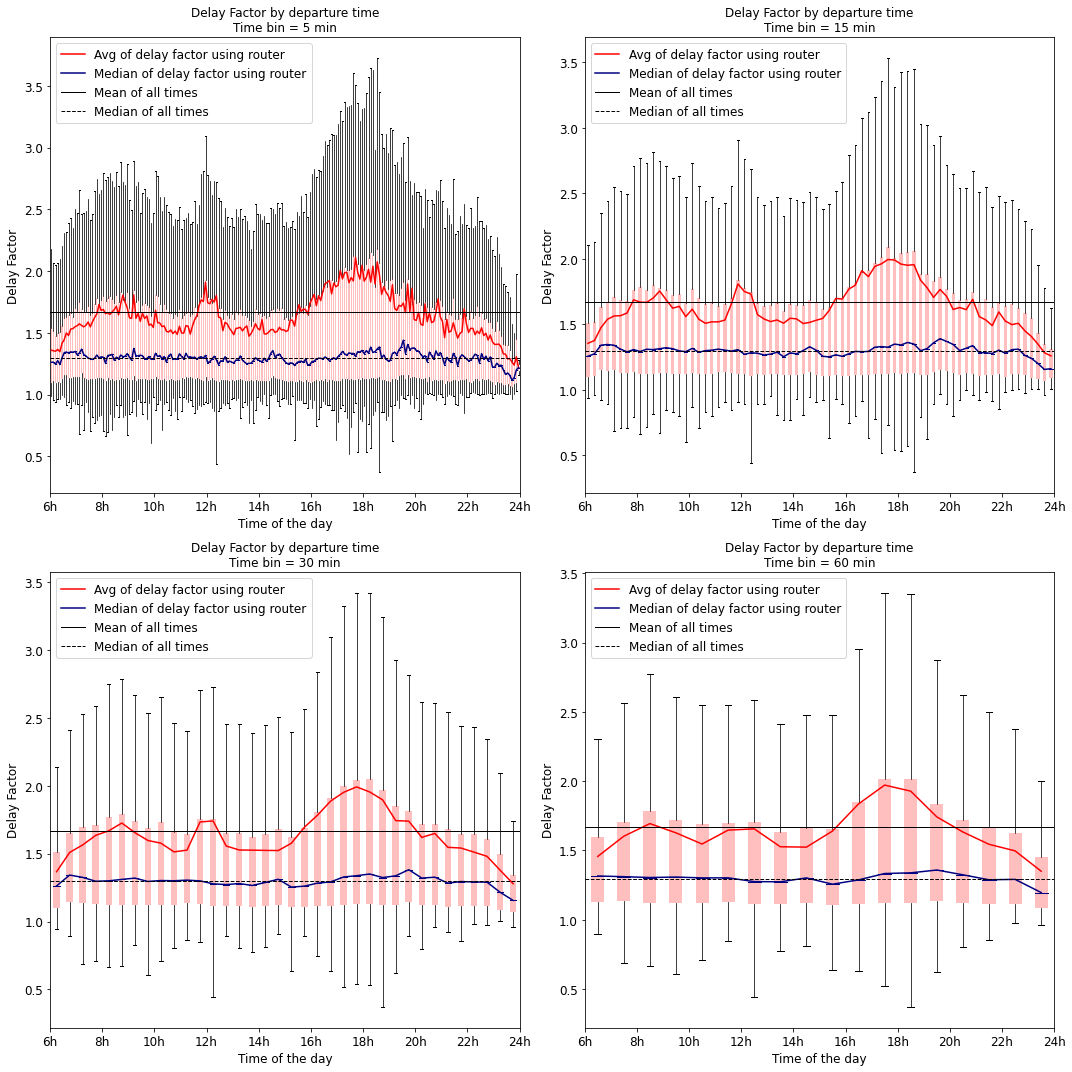

In [13]:
bin_durations_min = [5,15,30,60]
plotting_utils.plot_df_multiple_time_bins(
    data_global, start_time, end_time, bin_durations_min, iteration=-1,
    plot_estimated=False, plot_using_sum=False, filter_router_zeros=False, add_boxplots=True)

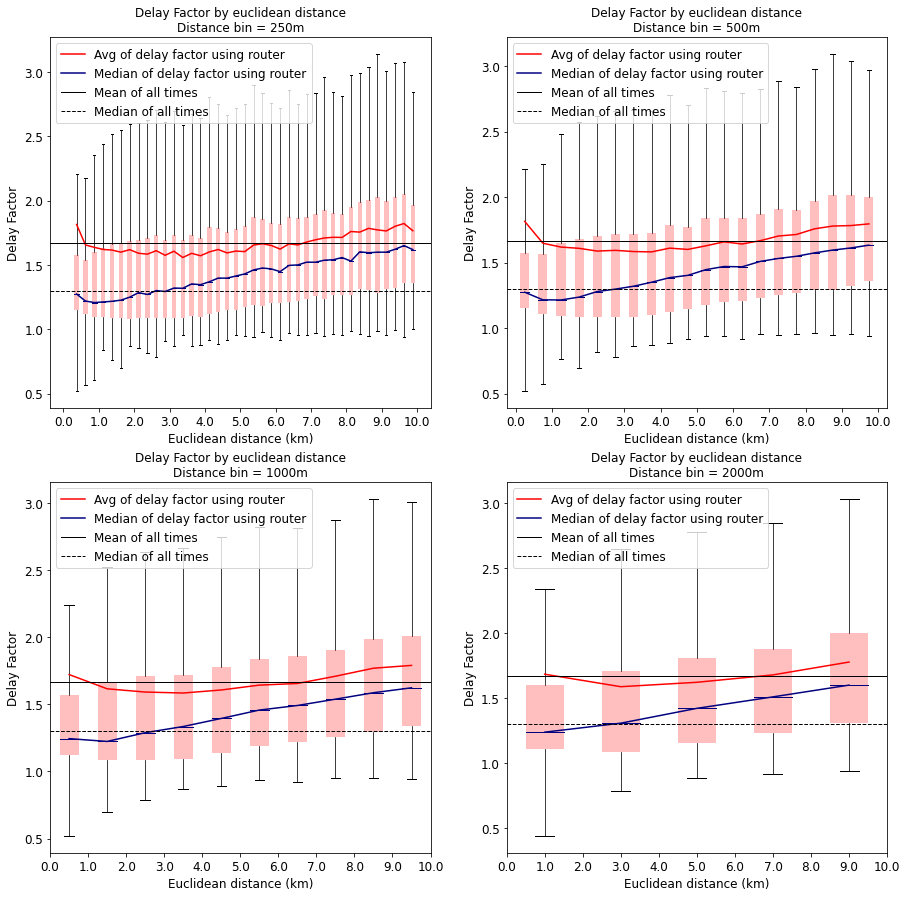

In [14]:
bin_distances_m = [250, 500, 1000, 2000]
plotting_utils.plot_df_multiple_distance_bins(
    data_global, min_distance, max_distance, bin_distances_m, iteration=-1,
    plot_estimated=False, plot_using_sum=False, filter_router_zeros=False, add_boxplots=True)

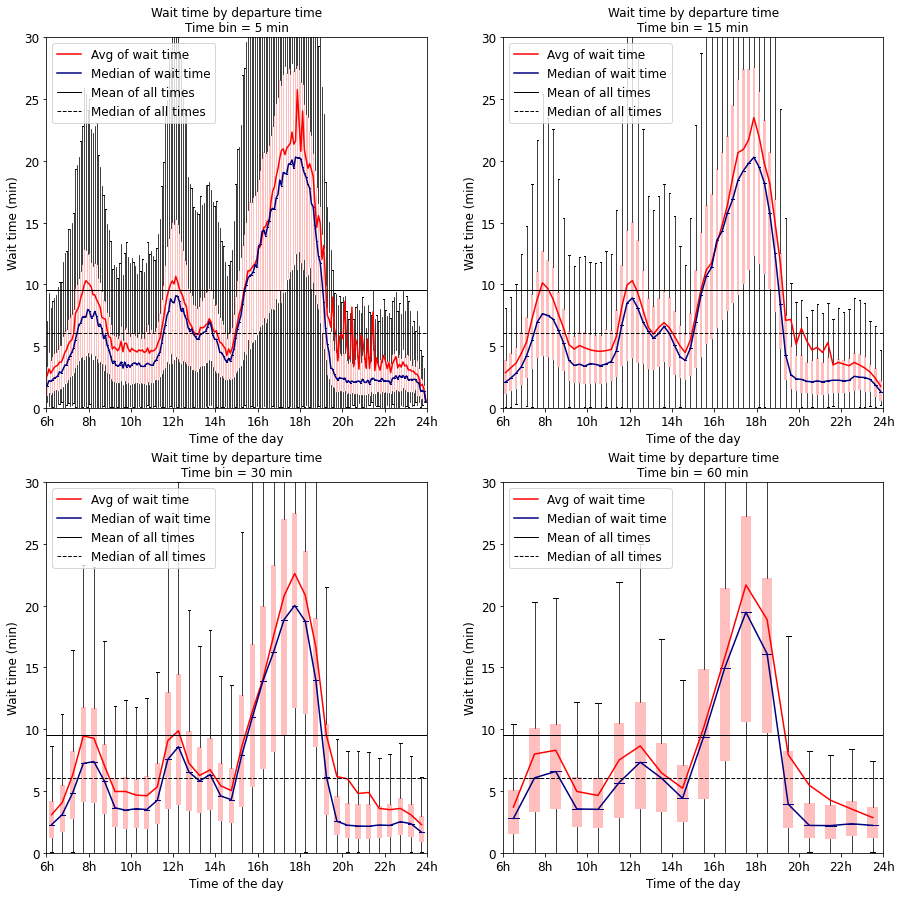

In [15]:
plotting_utils.plot_waiting_time_multiple_time_bins(
    data_global, start_time, end_time, bin_durations_min, iteration=-1,
    filter_router_zeros=False, add_boxplots=True, ylim=30)

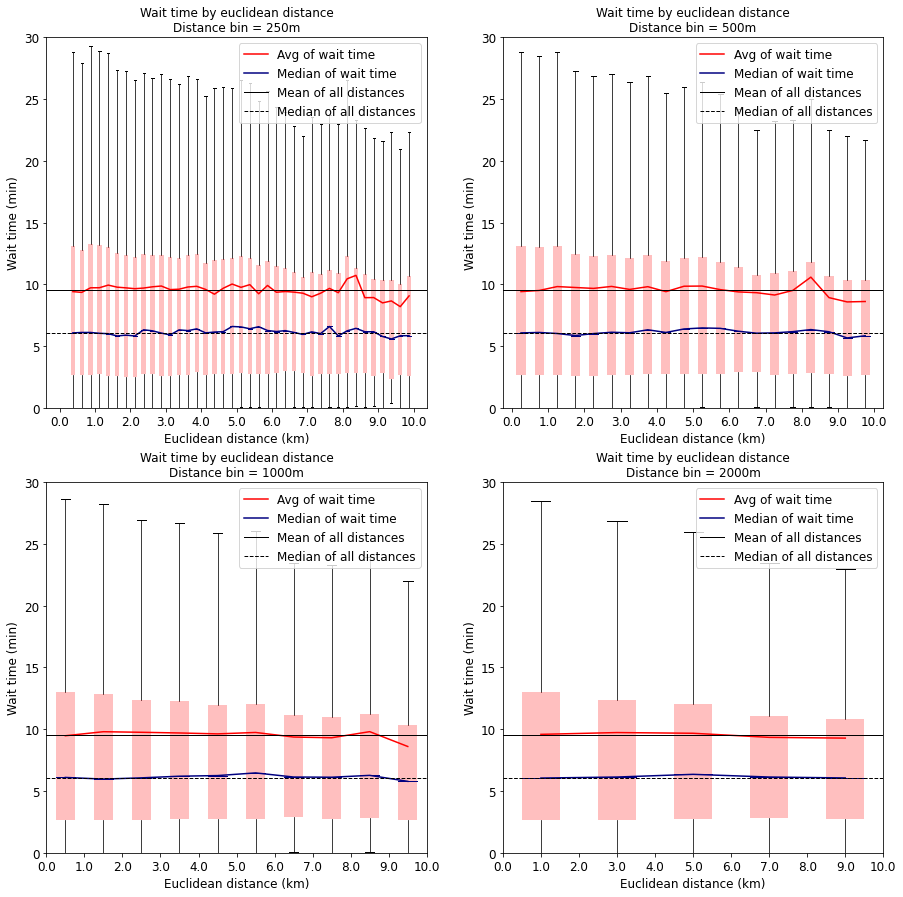

In [16]:
bin_distances_m = [250,500,1000, 2000]
plotting_utils.plot_waiting_time_multiple_distance_bins(
    data_global, min_distance, max_distance, bin_distances_m, iteration=-1,
    filter_router_zeros=False, add_boxplots=True, ylim=30)

In [17]:
lake_path = "/cluster/work/ivt_vpl/mfrancesc/lake/g1s20.shp"
zurich_districts_path = "/cluster/work/ivt_vpl/mfrancesc/city_districts/data/stzh.adm_stadtkreise_v.shp"
zurich_shp_path = '/cluster/work/ivt_vpl/mfrancesc/ScenarioBoundary/zurich_city_5km.shp'

Imputing 1621  zones onto 168007  points by spatial join...


100%|██████████| 16/16 [00:01<00:00, 14.27it/s]


Imputing 429  zones onto 168007  points by spatial join...


100%|██████████| 16/16 [00:01<00:00, 14.35it/s]


Imputing 198  zones onto 168007  points by spatial join...


100%|██████████| 16/16 [00:01<00:00, 14.15it/s]


Imputing 116  zones onto 168007  points by spatial join...


100%|██████████| 16/16 [00:01<00:00, 14.36it/s]


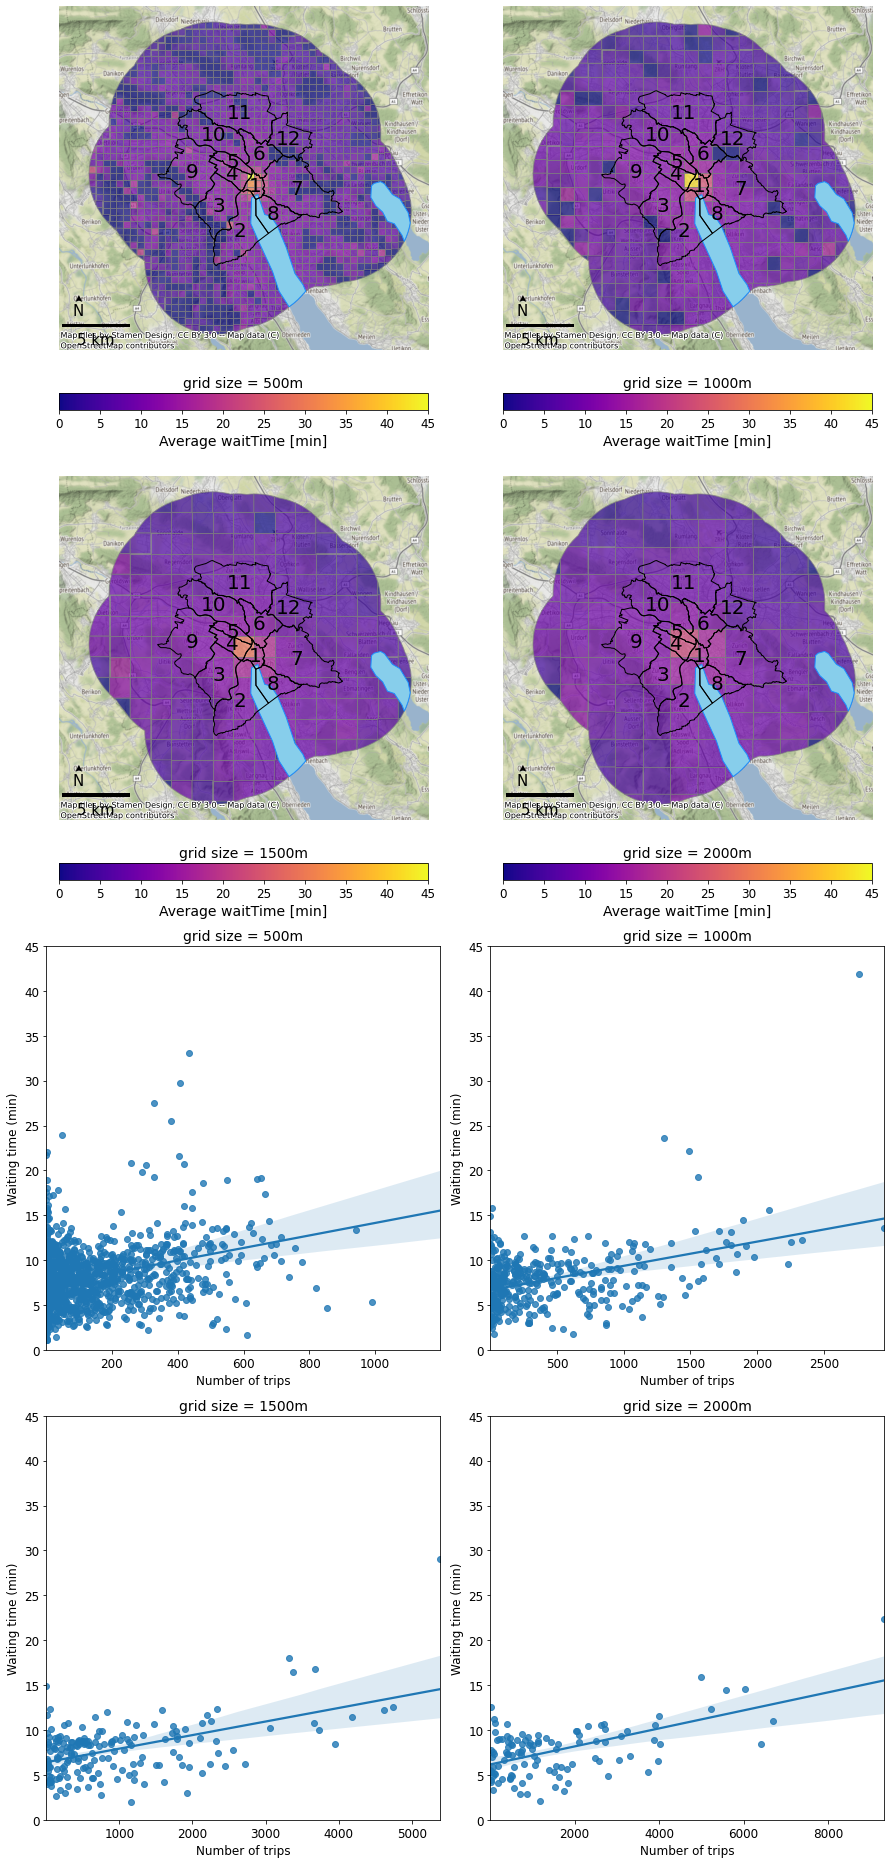

In [18]:
grid_sizes = [500,1000,1500,2000]
plotting_utils.plot_multigrid_wait_time(grid_sizes, data_global['drt_trips_stats'][-1], zurich_shp_path, 
                         lake_path, zurich_districts_path, map_limit=None, vmax=45)

In [19]:
euler_utils.compute_delay_factor_from_estimated(data_global['drt_trips_stats'])


100%|██████████| 51/51 [00:00<00:00, 722.08it/s]


Imputing 12  zones onto 168007  points by spatial join...


100%|██████████| 16/16 [00:01<00:00, 11.86it/s]


Imputing 12  zones onto 168007  points by spatial join...


100%|██████████| 16/16 [00:01<00:00, 11.43it/s]


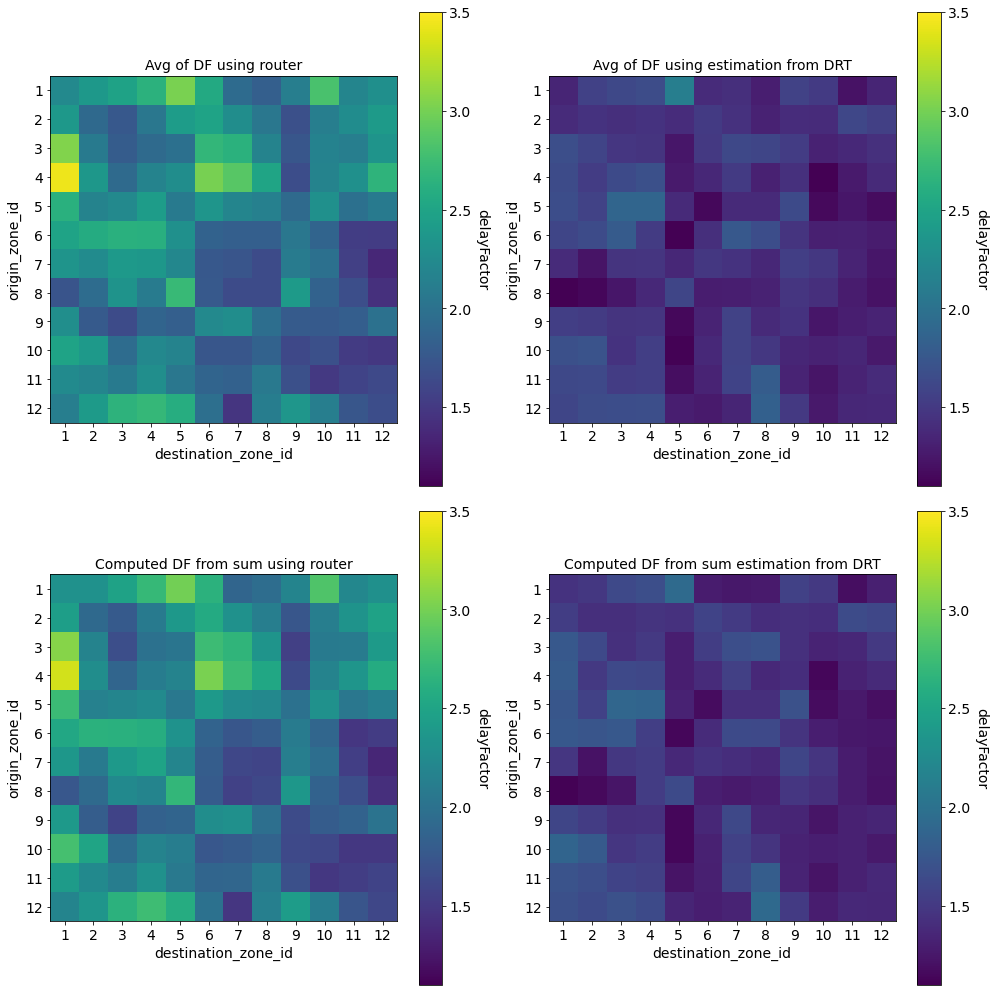

In [20]:
zones = plotting_utils.get_zurich_districts_gpd(zurich_districts_path)
plotting_utils.plot_OD_delayFactor_heatmaps(data_global['drt_trips_stats'][-1], 
                                            zones, "district_id", vmin=1.1,vmax=3.5)

Imputing 116  zones onto 168007  points by spatial join...


100%|██████████| 16/16 [00:01<00:00, 12.18it/s]


Imputing 116  zones onto 168007  points by spatial join...


100%|██████████| 16/16 [00:01<00:00, 14.23it/s]


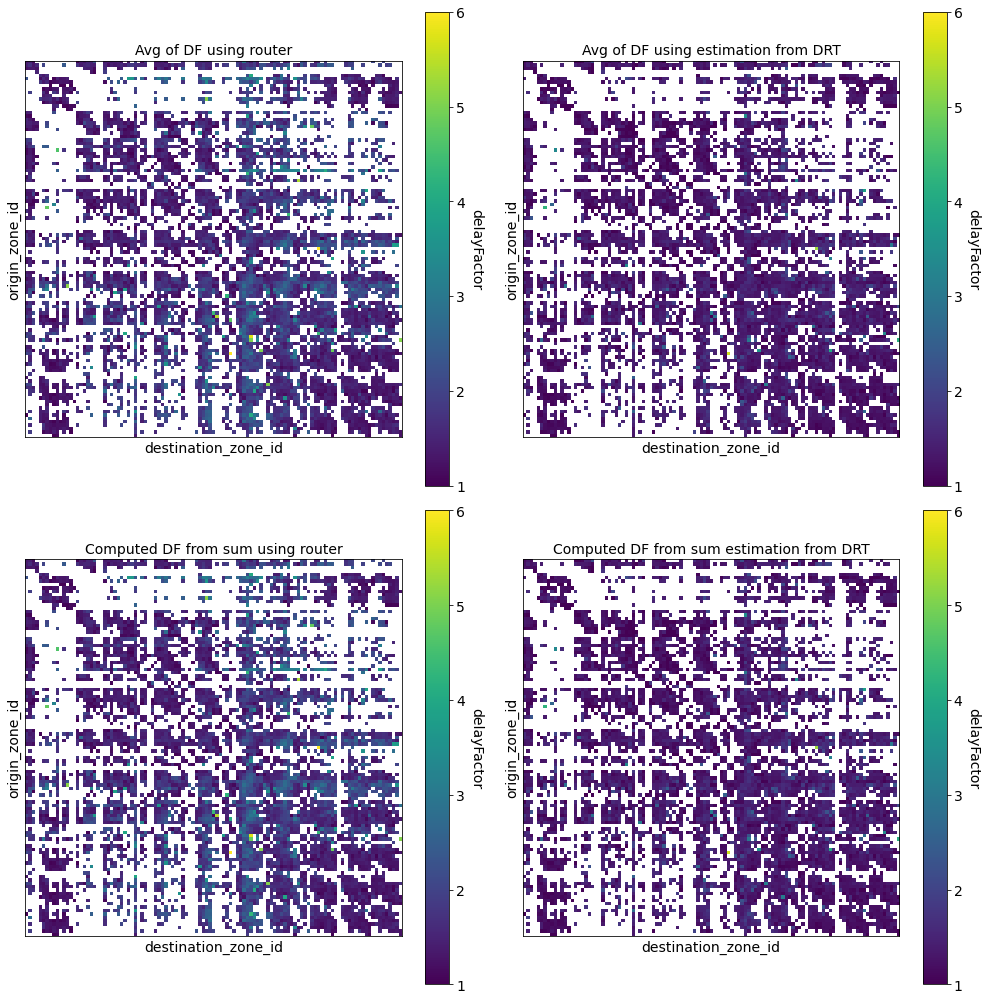

In [21]:
zones = utils.create_grid_from_shapefile(zurich_shp_path, 2000)
plotting_utils.plot_OD_delayFactor_heatmaps(data_global['drt_trips_stats'][-1], 
                                            zones, "grid_id", vmin=1, vmax=6)

In [22]:
data_global['drt_trips_stats'][-1].columns

Index(['personId', 'tripIndex', 'startTime', 'arrivalTime', 'totalTravelTime',
       'routerUnsharedTime', 'estimatedUnsharedTime', 'delayFactor',
       'waitTime', 'startX', 'startY', 'endX', 'endY', 'euclideanDistance',
       'delayFactorEstimatedDRT'],
      dtype='object')

In [23]:
print(plotting_utils.get_stats_table(data_global['drt_trips_stats'][-1]).to_latex())

\begin{tabular}{llr}
\toprule
                                  &     &          Value \\
\midrule
Number of rides & {} &  168007.000000 \\
Wait time (min) & Mean &       9.547336 \\
                                  & Median &       6.066667 \\
                                  & Std &      12.042291 \\
                                  & 75-percentile &      12.433333 \\
                                  & 99-percentile &      56.014667 \\
                                  & Max &     271.283333 \\
Travel time (min) & Mean &      12.982519 \\
                                  & Median &       7.483333 \\
                                  & Std &      16.026758 \\
                                  & 75-percentile &      16.033333 \\
                                  & 99-percentile &      79.250000 \\
                                  & Max &     282.833333 \\
Mean direct distance (km) &     &       2.583084 \\
Average detour factor (time wise) &     &       1.668359 \\
\bottomrule
\e